<a href="https://colab.research.google.com/github/Ali-mohammadi-design/Numpy_Stack/blob/main/Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Scipy is a usefull package for calculating PDF, CDF, and Convolution

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import norm

In [5]:
x=np.linspace(-6,6, 1000)

generates 1000 evenly spaced numbers between -6 and 6, inclusive.

In [6]:
fx=norm.pdf(x, loc=0, scale=1)

is calculating the probability density function (PDF) of a normal (Gaussian) distribution at each point in the array x.

Let's break it down:
norm.pdf(...)
norm is from the scipy.stats module, which provides statistical functions.

pdf stands for Probability Density Function.

So norm.pdf(x, loc=0, scale=1) gives the values of the standard normal distribution's PDF at the points in x.

Parameters:
x: An array of values (probably generated using np.linspace as you showed before).

loc=0: The mean (center) of the normal distribution is 0.

scale=1: The standard deviation (spread) is 1.

This defines the standard normal distribution (a bell curve centered at 0, with a width defined by standard deviation 1).

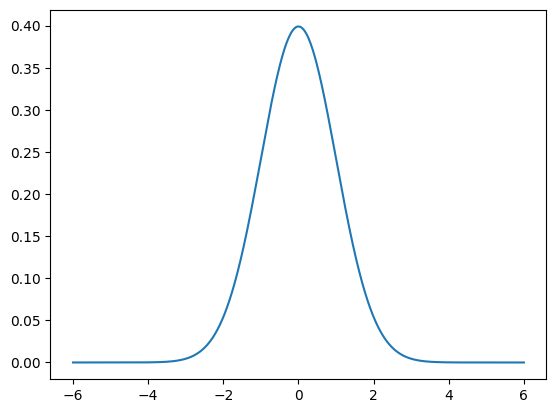

In [7]:
plt.plot(x, fx)

In [8]:
fx=norm.cdf(x, loc=0, scale=1)

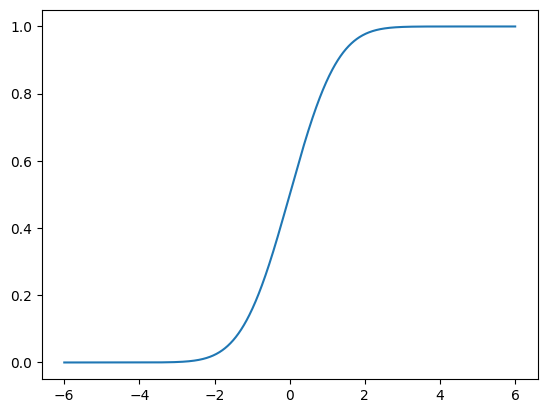

In [9]:
plt.plot(x,fx)

In [10]:
logfx=norm.logpdf(x,loc=0, scale=1)

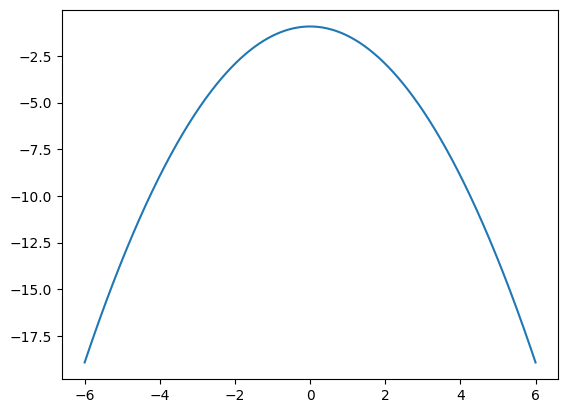

In [12]:
plt.plot(x,logfx)

***Convolution***

In [15]:
from PIL import Image

Saving PHOTO.jpg to PHOTO.jpg


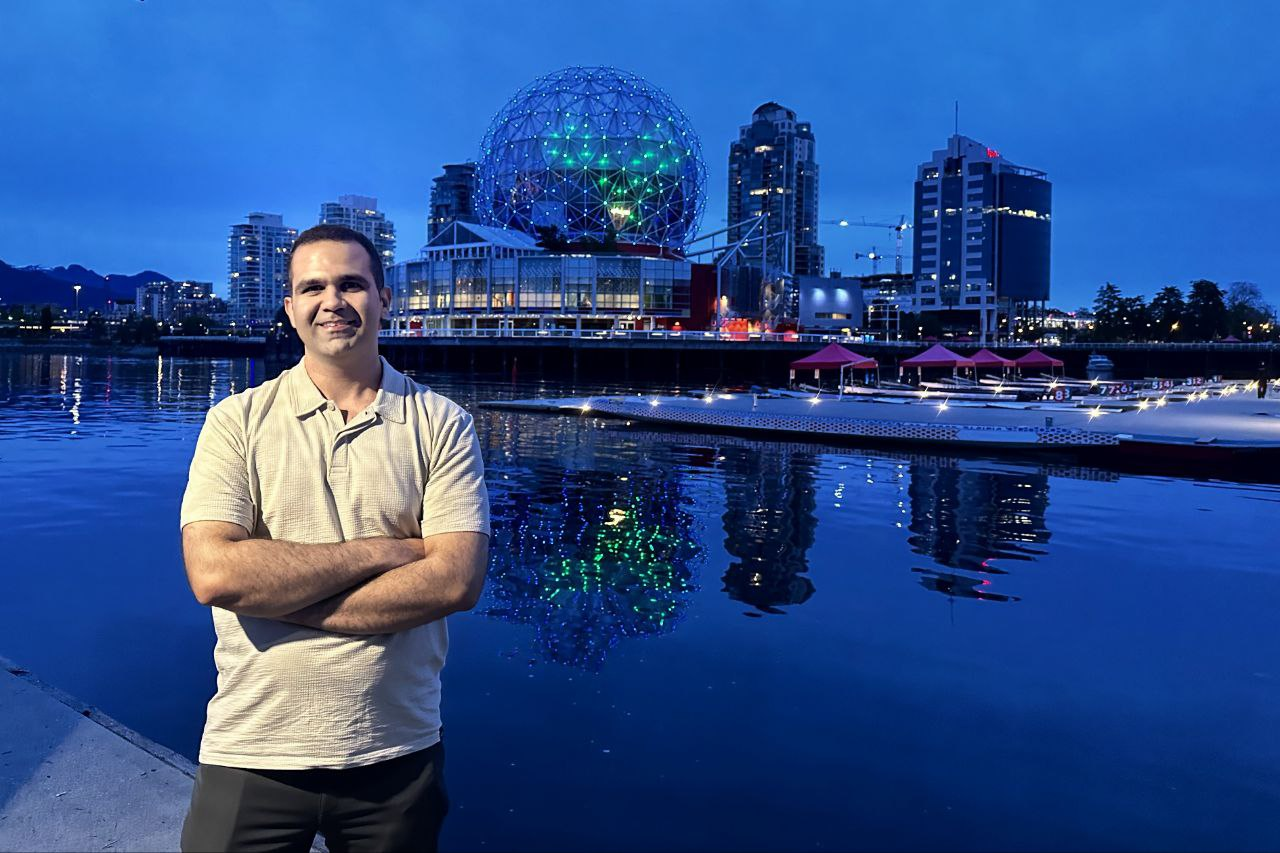

In [16]:
from google.colab import files
from PIL import Image
from io import BytesIO

# Upload the image file
uploaded = files.upload()

# Load and display the image
for filename in uploaded.keys():
    image = Image.open(BytesIO(uploaded[filename]))
    display(image)

In [17]:
gray=np.mean(image, axis=2)

is converting a color image to grayscale using NumPy.

🔍 Let’s break it down:
Assume image is a color image loaded as a NumPy array with shape like:

arduino
Copy
Edit
(height, width, 3)
That 3 at the end stands for the Red, Green, and Blue (RGB) color channels.

🧠 What np.mean(image, axis=2) does:
axis=2 means: take the average across the color channels for each pixel.

So, for every pixel, it calculates:

ini
Copy
Edit
grayscale_pixel = (R + G + B) / 3
The result is a 2D array (height × width), where each pixel is now a single grayscale value instead of RGB.

What axis means in NumPy:
axis=0 → Operate down columns (i.e., across rows).

axis=1 → Operate across columns (i.e., across each row).

axis=2 → Operate across depth — used when there’s a 3rd dimension, like RGB channels in images.

📸 In an image (3D array):
When you load a color image, it’s usually stored like this:

arduino
Copy
Edit
image.shape = (height, width, 3)
So it looks like:

axis=0: height (rows)

axis=1: width (columns)

axis=2: color channels (Red, Green, Blue)

✅ So, np.mean(image, axis=2) means:
👉 “For each pixel, take the average of the R, G, and B values.”

It removes the 3rd axis (RGB), and you’re left with a 2D grayscale image (just height × width).



In [18]:
display(gray)

array([[130.        , 130.        , 130.        , ..., 120.66666667,
        120.66666667, 120.66666667],
       [130.        , 130.        , 130.        , ..., 120.66666667,
        120.66666667, 120.66666667],
       [130.        , 130.        , 130.        , ..., 120.66666667,
        120.66666667, 120.66666667],
       ...,
       [126.        , 131.        , 136.        , ...,  43.66666667,
         43.66666667,  43.66666667],
       [123.        , 127.        , 130.        , ...,  40.66666667,
         40.66666667,  40.66666667],
       [ 81.66666667,  85.66666667,  87.66666667, ...,  35.        ,
         34.33333333,  34.33333333]])

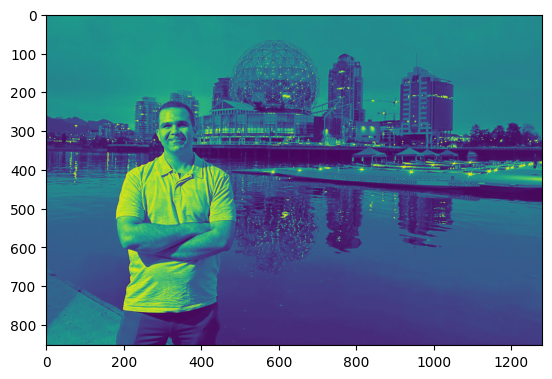

In [19]:
plt.imshow(gray)

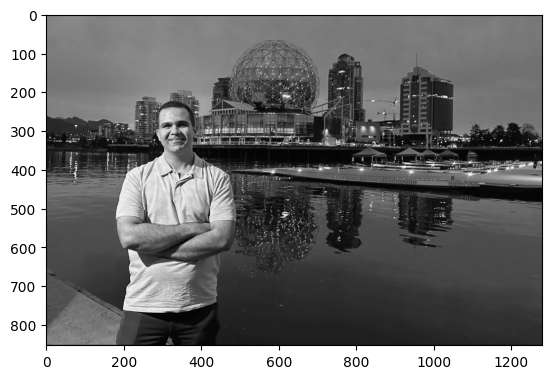

In [20]:
plt.imshow(gray, cmap='gray')

Why did we use camp="gray"????



"Each number in gray is the same across R, G, B → So it's already gray, right?"

Yes! That’s true if you had something like:

python
Copy
Edit
gray_rgb = [[[150, 150, 150], [120, 120, 120], ...]]
That is a 3D RGB image, where all channels are equal → this gives a gray image.

❗ But in your case:
python
Copy
Edit
gray = np.mean(image, axis=2)
You now have a 2D array like:

python
Copy
Edit
[[150, 120, 100, ...],
 [130, 200, 90,  ...],
  ...]
This is not an RGB image anymore — it’s just a matrix of brightness values (one number per pixel, not 3). Matplotlib doesn’t know how to turn these into colors without your help.

🎨 What imshow() Does:
If it sees a 3D array, like shape (height, width, 3) — it assumes RGB automatically.

If it sees a 2D array, like shape (height, width), it thinks:

"Hmm… I don’t know how to color these values unless you give me a colormap (cmap)."

So without cmap='gray', it defaults to something like 'viridis' (purple to yellow), just to show the data.

Let's create two dimentional Gaussian Filter Now

In [22]:
x=np.linspace(-6,6, 50)

In [24]:
fx=norm.pdf(x, loc=0, scale=1)

In [25]:
filt=np.outer(fx,fx)

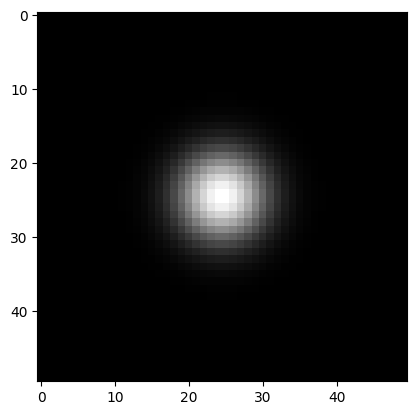

In [27]:
plt.imshow(filt, cmap='gray')

In [28]:
from scipy.signal import convolve2d

Now we apply this filter to the image

In [29]:
out=convolve2d(gray,filt)

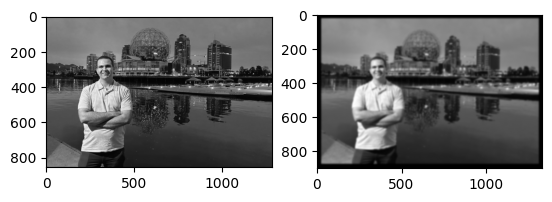

In [31]:
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(out, cmap='gray')